### Auto-Encoder(AE)
- 이는 GAN과 마찬가지로 딥러닝을 이용해 가상의 이미지를 만드는 알고리즘이다.
- 하지만 차이점이 있다면 GAN은 아얘 새로운 가상의 이미지를 만드는 반면 AE는 입력 데이터의 특징을 효울적으로 담아낸 이미지를 만들어 낸다.
    - 즉, 사람의 얼굴을 만든다고 할 때에 오토인코더는 초점이 좀 흐릿하고 윤곽이 불분명 하지만 사람의 특징을 유추할 수 있는 것들이 모여 이미지가 만들어지는 것이다.
    
**구조**
1. 입력한 이미지와 똑같은 크기로 출력 층을 만든다.
2. 입력층보다 적은 수의 노드를 가진 은닉층을 중간에 넣어 줌으로서 차원을 줄일 수 있게 된다.
3. 이때 차원이 줄어들면서 소실된 데이터를 복원하기 위해서 학습을 시작하고, 이 과정을 통해 입력 데이터의 특징을 효율적으로 응축한 새로운 출력이 나오게 된다.  


#### 함수 import 해오기

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, Conv2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### MNIST 데이터 셋 불러오기

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32')/255

#### 생성자 모델 만들기

In [3]:
autoencoder = Sequential()

#### 인코딩 부분

In [5]:
autoencoder.add(Conv2D(16, kernel_size = 3, padding = 'same', input_shape = (28,28,1), activation = 'relu'))
autoencoder.add(MaxPooling2D(pool_size = 2, padding = 'same'))
autoencoder.add(Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu'))
autoencoder.add(MaxPooling2D(pool_size = 2, padding = 'same'))
autoencoder.add(Conv2D(8, kernel_size = 3, strides = 2, padding = 'same', activation = 'relu'))

#### 디코딩 부분
- 세번째 Conv2D layer에서 ```padding = 'same'```이라는 문구를 넣지 않았는데, 그 이유는 오토인코더의 목적이 입력과 같은 크기의 이미지를 생성해야 하는 것이기 때문에 크기를 맞춰주기 위해서이다.
- 인코딩 부분에서 차원을 MaxPooling으로 줄여주었다면 디코딩 부분에서는 UpSampling2D로 차원의 크기를 늘려주는 것이다. 
    - 인코딩 부분에서 **28->14->7->4(마지막 Conv2D에서 strides = 2)**까지 크기가 바뀌었고
    - 디코딩 부분에서는 **4->8->16->14(Conv2D에서 padding을 설정하지 않음)->28**

In [6]:
autoencoder.add(Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size = 3, activation = 'relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size = 1, padding = 'same', activation = 'sigmoid'))

In [8]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

#### 컴파일 및 학습

In [10]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 128, validation_data = (x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 44s 731us/sample - loss: 0.2240 - accuracy: 0.7962 - val_loss: 0.1572 - val_accuracy: 0.8005
Epoch 2/50
60000/60000 [==============================] - 46s 765us/sample - loss: 0.1503 - accuracy: 0.8023 - val_loss: 0.1438 - val_accuracy: 0.8026
Epoch 3/50
60000/60000 [==============================] - 47s 778us/sample - loss: 0.1417 - accuracy: 0.8044 - val_loss: 0.1381 - val_accuracy: 0.8044
Epoch 4/50
60000/60000 [==============================] - 46s 769us/sample - loss: 0.1371 - accuracy: 0.8056 - val_loss: 0.1345 - val_accuracy: 0.8060
Epoch 5/50
60000/60000 [==============================] - 46s 769us/sample - loss: 0.1342 - accuracy: 0.8063 - val_loss: 0.1326 - val_accuracy: 0.8040
Epoch 6/50
60000/60000 [==============================] - 46s 766us/sample - loss: 0.1322 - accuracy: 0.8068 - val_loss: 0.1303 - val_accuracy: 0.8059
Epoch 7/50
60000/60000 [====================

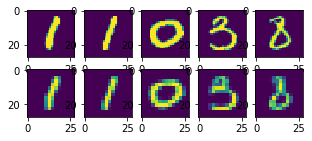

In [13]:
random_test = np.random.randint(x_test.shape[0], size = 5)
pred_img = autoencoder.predict(x_test)

plt.figure(figsize = (7,2))

for i, idx in enumerate(random_test):
    ax = plt.subplot(2,7,i+1)
    plt.imshow(x_test[idx].reshape(28,28))
    ax = plt.subplot(2,7,7+i+1)
    plt.imshow(pred_img[idx].reshape(28,28))
plt.show()

- 위의 그림이 기존의 데이터이고 아래의 데이터가 오토인코더를 통해 생성된 데이터이다.

### 이쯤에서 CNN Layer에 사용되는 것들과 CNN의 작동 원리에 대해 간단하게 다시 정리해 보고자 한다.
#### 그렇게 하기 위해서 CIFAR10 데이터셋을 이용해서 CNN의 원리를 정리해 가며 학습을 시켜 보고자 한다.
- 일단 이미지 데이터의 다중 분류이기 때문에 심층 신경망인 DNN보다는 CNN을 이용하는 것이 더 적합할 것이다.
- cifar10 dataset는 전부 keras.datasets에 있기 때문에 쉽게 다운받을 수 있다.

In [53]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
from sklearn.model_selection import train_test_split

In [99]:
(x,_),(_,_) = cifar10.load_data()
x[34]

array([[[172, 187, 130],
        [171, 186, 130],
        [168, 182, 126],
        ...,
        [158, 170, 113],
        [156, 169, 113],
        [147, 163, 107]],

       [[169, 185, 123],
        [168, 183, 122],
        [168, 184, 123],
        ...,
        [158, 175, 114],
        [152, 170, 110],
        [145, 165, 107]],

       [[174, 190, 126],
        [169, 185, 122],
        [170, 186, 123],
        ...,
        [157, 177, 115],
        [149, 170, 108],
        [146, 168, 109]],

       ...,

       [[150, 163, 100],
        [157, 168, 103],
        [162, 170, 104],
        ...,
        [158, 168, 108],
        [147, 160,  99],
        [139, 154,  90]],

       [[143, 154,  89],
        [149, 158,  90],
        [155, 161,  96],
        ...,
        [148, 157,  99],
        [143, 153,  92],
        [140, 153,  88]],

       [[148, 158,  93],
        [146, 155,  89],
        [149, 157,  92],
        ...,
        [137, 143,  86],
        [134, 139,  80],
        [136, 143,  82]]

In [48]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [54]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

- 데이터 정규화의 과정으로 Normalization과 Standardization이 존재하는데, Normalization은 데이터의 범위를 0~1로 바꾸어 주고, Standardization은 평균이 0이고 표준편차가 1인 정규 분포의 형태로 데이터를 바꾸어 준다.
    - 이미지 데이터에 대한 Normalization은 픽셀값을 255.0으로 나눠줌으로서
    - Standardization은 **학습 데이터**의 평균과 std(표준편차)로 모든 (데이터-평균)/std를 함으로서 구한다.

In [55]:
#데이터 정규화 해주기 
#반드시 train dataset에있는 정보의 평균과 표준편차를 이용해서 정규화를 해 주어야 한다.
mean = np.mean(x_train)
std = np.std(x_train)

In [56]:
x_train = (x_train-mean)/std
x_test = (x_test-mean)/std
x_val = (x_val-mean)/std

In [57]:
import tensorflow as tf
y_train, y_test,y_val = tf.keras.utils.to_categorical(y_train,10), tf.keras.utils.to_categorical(y_test, 10), tf.keras.utils.to_categorical(y_val)

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    horizontal_flip = True, width_shift_range = 0.1, height_shift_range = 0.1, fill_mode = 'nearest')
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(x_train, y_train, batch_size = 32, shuffle = True)
val_generator = val_datagen.flow(x_val, y_val, batch_size = 32, shuffle = True)

In [67]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy

In [71]:
model = Sequential()
model.add(Conv2D(32, input_shape = (32,32,3), kernel_size = (2,2), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, kernel_size = (3,3),padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)             

In [72]:
from tensorflow.keras.callbacks import EarlyStopping
early_cb = EarlyStopping(monitor = 'val_loss', patience = 10)
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
model.fit_generator(train_generator, epochs = 30, steps_per_epoch = x_train.shape[0]/32, validation_data = val_generator, callbacks = [early_cb])

Epoch 1/30
1250/1250 [==============================] - 183s 146ms/step - loss: 1.7109 - accuracy: 0.3863 - val_loss: 1.2795 - val_accuracy: 0.5443
Epoch 2/30
1250/1250 [==============================] - 176s 141ms/step - loss: 1.4081 - accuracy: 0.4898 - val_loss: 1.1440 - val_accuracy: 0.5876
Epoch 3/30
1250/1250 [==============================] - 174s 139ms/step - loss: 1.2917 - accuracy: 0.5337 - val_loss: 1.0932 - val_accuracy: 0.6014
Epoch 4/30
1250/1250 [==============================] - 182s 145ms/step - loss: 1.2034 - accuracy: 0.5679 - val_loss: 1.1297 - val_accuracy: 0.6027
Epoch 5/30
1250/1250 [==============================] - 170s 136ms/step - loss: 1.1425 - accuracy: 0.5914 - val_loss: 1.0007 - val_accuracy: 0.6469
Epoch 6/30
1250/1250 [==============================] - 169s 135ms/step - loss: 1.0940 - accuracy: 0.6118 - val_loss: 0.8925 - val_accuracy: 0.6899
Epoch 7/30
1250/1250 [==============================] - 172s 138ms/step - loss: 1.0459 - accuracy: 0.6259 - val_

**CNN Layer 정리**
1. 이미지 데이터의 형태를 일단 봐야 한다. 특히 DNN이 아니라 CNN layer에 넣어서 이미지 데이터의 특징을 추출하고 싶다면 2차원 데이터로 reshape하는 것이 필수이다. 이는 일반적으로 x_data = x_data.reshape(x_data.shape[0] = 전체 데이터의 개수, 가로 픽셀 개수, 세로 픽셀 개수)와 같은 방법으로 하면 된다.
2. CNN layer을 사용한다는 것은 '이미지 인식에서 성능이 뛰어난 컨볼루션 신경망을 **얹는다**는 느낌'으로 받아들이자.
3. **컨볼루션(합성곱)**이란 nxn의 크기의 마스크가 있다고 할때에 그 마스크의 각 칸에 가중치가 곱해져 있고, 각 마스크가 이동하면서 원래 이미지의 값들과 곱해서 차원을 줄여 나가게 된다.
    - 이런 합성곱 층을 만들면 입력 데이터로부터 더 정교한 특징의 추출이 가능하다.
    - 마스크를 여러 개 만들면 결국 여러개의 합성곱 층이 만들어진다.
        - 첫 입력 파라미터 = 적용해줄 마스크의 수
        - kernel_size = 마스크(kernel)의 크기를 결정 (행x열)의 형태
        - input_shape = (행, 열, 색상(1이면 흑백 3이면 RGB))의 꼴로 지정
        - activation = 활성화 함수
4. MaxPooling
- 컨볼루셩(합성곱)층으로 만든 이미지의 결과가 너무 클 때 이를 축소하는 과정이 필요하다.
- 정해진 구역 안에서 최댓값을 뽑는 maxpooling과 평균값을 뽑는 average pooling이 존재
    - pool_size 를 지정해야 하는데 n으로 지정해 주면 사이즈가 1/n배가 된다.
5. 추가적으로 Dropout, Flatten이 필요
    - Dropout는 과적합을 피하기 위해
    - Flatten은 Dense layer로 CNN layer의 출력값을 전달하기 위해 2차원 배열을 1차원 배열로
    

In [73]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.6756280704498291, 0.7667]

**Accuracy = 76.67%**

In [108]:
import matplotlib.pyplot as plt
pred = model.predict_classes(x_test)
row, col = 3,3

In [138]:
index = np.random.randint(0,len(x_test), 9)

In [139]:
index

array([9832,  765, 1389, 7922, 3181, 8846, 5123, 1423, 6211])

In [140]:
fig = plt.figure
img = x_test[index]
label = pred[index]
real = y_test[index]

In [141]:
img[0].shape

(32, 32, 3)

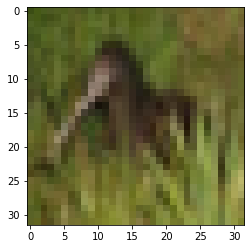

In [142]:
plt.imshow(((img[0]*std)+mean).astype(np.uint8))

In [143]:
real[0][0]

0.0

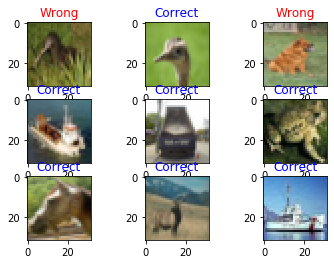

In [148]:
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(((img[i]*std)+mean).astype(np.uint8))
    for k in range(10):
        if real[i][k] == 1.0:
            break
    if k == label[i]:
        plt.title('Correct',color = 'b')
    else:plt.title('Wrong',color = 'r')
    

- 직접 시각화를 해서 봐도 꽤 정답률이 높은 것으로 보인다.
- 무작정 layer의 수가 많다고 좋은 것이아니고 무엇보다도 정규화를 제대로 해주니까 제대로 된 결과가 나오는 것 같기도 하다.